In [104]:
from Bio import Phylo
import matplotlib
#import imp
tree = Phylo.read("ant_OR_Zhou_newick_format_tree.txt", "newick")

In [3]:
#output tree 
#print(tree)

In [4]:
#output tree as ascii
#Phylo.draw_ascii(tree)

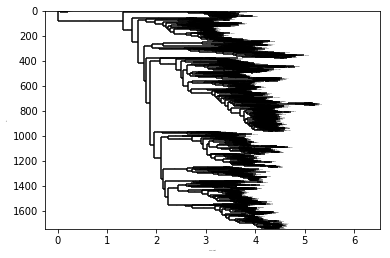

In [105]:
tree.rooted = True
Phylo.draw(tree)

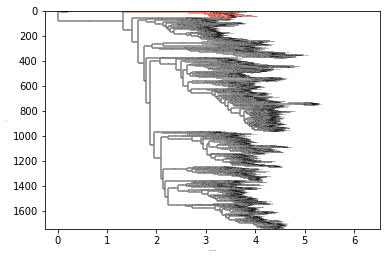

In [106]:
tree = tree.as_phyloxml()
tree.root.color = (128, 128, 128)
mrca = tree.common_ancestor({"name": "PbOr170"}, {"name": "LhOr59"})
mrca.color = "salmon"
#tree.clade[0, 1].color = "blue"
Phylo.draw(tree)

In [6]:
def get_parent(tree, child_clade):
    node_path = tree.get_path(child_clade)
    return node_path[-2]

# Select a clade
myclade = next(tree.find_clades("PbOr170"))
# Test the function
parent = get_parent(tree, myclade)
assert myclade in parent

In [7]:
def all_parents(tree):
    parents = {}
    for clade in tree.find_clades(order='level'):
        for child in clade:
            parents[child] = clade
    return parents

# Example
parents = all_parents(tree)
myclade = next(tree.find_clades("PbOr170"))
parent_of_myclade = parents[myclade]
assert myclade in parent_of_myclade

In [8]:
def lookup_by_names(tree):
    names = {}
    for clade in tree.find_clades():
        if clade.name:
            if clade.name in names:
                raise ValueError("Duplicate key: %s" % clade.name)
            names[clade.name] = clade
    return names

In [9]:
names = lookup_by_names(tree)
#print(names)

In [10]:
#testing most common recent ancestory function for clade A
mrca = tree.common_ancestor({"name": "PbOr170"}, {"name": "LhOr59"})

In [11]:
#testing get terminals fucntion on the ant tree
#tree.get_terminals()

In [24]:
#tree.get_nonterminals()

In [107]:
def clade_siblings(relative1,relative2,clade_name):
    mcra=tree.common_ancestor({"name":"%s"%relative1},{"name":"%s"%relative2})
    clade_name=[]
    clade_of_interest=mcra.get_terminals()

    for i in range(0,len(clade_of_interest)):
        clade_name.append(clade_of_interest[i].name)
    return(clade_name)

In [108]:
#loop through a list and make the clades in alphabelical order
#call clade_siblings
#create ant clade dictionary
ant_clades={
    "Clade_A": ["PbOr170","LhOr59"],
    "Clade_B": ["HsOr188","LhOr210"],
    "Clade_C": ["AmOr116", "HsOr219"],
    "Clade_D": ["NvOr121PSE", "CfOr262"],
    "Clade_E": ["NvOr98","LhOr135"],
    "Clade_F": ["AmOr171","NvOr263"],
    "Clade_G": ["NvOr45","PbOr195JF"],
    "Clade_H": ["NvOr44","PbOr190FIX"],
    "Clade_I": ["NvOr296","PbOr145"],
    "Clade_J": ["PbOr154","AmOr84"],
    "Clade_K": ["AmOr1","PbOr3"],
    "Clade_L": ["NvOr8","PbOr12"],
    "Clade_M": ["LhOr146","PbOr56FIX"],
    "Clade_N": ["NvOr61","LhOr155"],
    "Clade_O": ["NvOr60","CfOr52"],
    "Clade_P": ["AmOr65","CfOr101"],
    "Clade_Q": ["AmOr160","HsOr187"],
    "Clade_R": ["HsOr179","LhOr207"],
    "Clade_S": ["PbOr149", "NvOr288"],
    "Clade_T": ["NvOr25", "HsOr86"],
    "Clade_U": ["NvOr38", "LhOr180FN"],
    "Clade_V": ["NvOr64","HsOr127"],
    "Clade_9-exon":["LhOr249","PbOr352INT"]
}

#returns a dictionary of lists that you can call by the clades
def make_clade_lists(clade_dict):
    clade_members={}
    for key,value in clade_dict.items():
        clade_name="clade_"+key.split("_")[1]
        clade_members[clade_name]=clade_siblings(value[0],value[1],key)
        #print(clade_name)
        #clade_siblings(value[0],value[1],key)
    return clade_members
#ant_clade_members=make_clade_lists(ant_clades)
ant_member_dict=make_clade_lists(ant_clades)
#print(ant_member_dict)
print(ant_member_dict["clade_9-exon"])


['LhOr249', 'PbOr247', 'CfOr299', 'PbOr248FIX', 'PbOr250', 'LhOr250', 'PbOr255', 'PbOr254', 'PbOr252', 'PbOr253', 'PbOr251', 'PbOr257FC', 'PbOr258FIX', 'PbOr259', 'PbOr241', 'HsOr255', 'LhOr238', 'PbOr242', 'CfOr366', 'CfOr365', 'LhOr232', 'PbOr233', 'PbOr234', 'CfOr272', 'CfOr271', 'LhOr234', 'LhOr235', 'PbOr237', 'PbOr240', 'LhOr254FIX', 'LhOr256', 'PbOr264', 'HsOr246', 'PbOr266', 'LhOr257', 'HsOr243', 'LhOr255', 'LhOr261', 'LhOr259', 'PbOr265FC', 'LhOr243', 'LhOr244', 'LhOr260FIX', 'LhOr241', 'LhOr242', 'NvOr204', 'NvOr202', 'NvOr203', 'NvOr198', 'NvOr201', 'NvOr191', 'NvOr192', 'NvOr196', 'NvOr194', 'NvOr193', 'NvOr195', 'NvOr207', 'NvOr160', 'NvOr161', 'NvOr301FIX', 'NvOr216', 'NvOr217', 'NvOr173', 'NvOr175', 'NvOr187', 'NvOr188', 'NvOr189', 'NvOr190', 'NvOr181', 'NvOr183', 'NvOr180', 'NvOr179', 'NvOr177', 'NvOr182', 'NvOr165JOI', 'NvOr162', 'NvOr163', 'NvOr159', 'NvOr156', 'NvOr158', 'NvOr154', 'NvOr157', 'NvOr155INT', 'NvOr166', 'NvOr167', 'NvOr168', 'NvOr169INT', 'NvOr170', 'Nv

In [109]:
#double checking that this method is not missing any members
#should be 588 according to iTol
print(len(ant_member_dict["clade_9-exon"]))
#just double checking the math from the paper.
print(64+34+118+119+114+139)

588
588


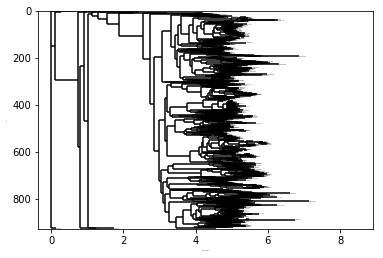

In [110]:
#create a second tree
remade_tree = Phylo.read("../../remade_alignment_wo_AjapIR/RAxML_bipartitionsBranchLabels.combined_OR_prot.out", "newick")
Phylo.draw(remade_tree)

In [111]:
#loop through the clades of second tree
remade_clades={
    "Clade_A": ["PbOr170","LhOr59"],
    "Clade_B": ["AmOr119","CfOr188"],
    "Clade_C": ["AmOr116", "HsOr219"],
    "Clade_D": ["NvOr121PSE", "CfOr262"],
    "Clade_E": ["NvOr98","LhOr135"],
    "Clade_F": ["AmOr171","NvOr263"],
    "Clade_G": ["NvOr45","PbOr195JF"],
    "Clade_H": ["NvOr44","PbOr190FIX"],
    "Clade_I": ["NvOr296","PbOr145"],
    "Clade_J": ["PbOr154","AmOr84"],
    "Clade_K": ["AmOr1","PbOr3"],
    "Clade_L": ["NvOr8","PbOr12"],
    "Clade_M": ["LhOr146","PbOr56FIX"],
    "Clade_N": ["NvOr61","LhOr155"],
    "Clade_O": ["NvOr60","CfOr52"],
    "Clade_P": ["AmOr65","CfOr101"],
    "Clade_Q": ["AmOr160","HsOr187"],
    "Clade_R": ["HsOr179","LhOr207"],
    "Clade_S": ["PbOr149", "NvOr288"],
    "Clade_T": ["NvOr25", "HsOr86"],
    "Clade_U": ["NvOr38", "LhOr180FN"],
    "Clade_V": ["NvOr64","HsOr127"]
}

In [112]:
#compare the members of each clade
    #extract the ants from each clade 
    #extract the bees from each clade
    #extract wasps from each clade
        #see if the ants are in both lists
            #percentage that is in both
    #return the percent matching that is in each clade
    
def compare_clades(dict_1,dict_2):
    #for key_1,value_1 in dict_1.items():
    #    for key_2, value_2 key_1 in dict_2.items():
    #        if key_1 == key_2:
                #mcra_1=tree.common_ancestor({"name":"%s"%dict_1.value_2[0]},{"name":"%s"%dict_1.value_2[1]})
                #mcra_2=tree.common_ancestor({"name":"%s"%dict_2.value_2[0]},{"name":"%s"%dict_2.value_2[1]})
                #creates a list of the terminals (the individual genes) within the clade of interest
                #clade_of_interest_1=mcra_1.get_terminals()
                #clade_of_interest_2=mcra_2.get_terminals()
                
                #for gene in clade_of interest_1:
                #    if gene in clade_of_interest_2:
                #        print("found a match %s"%gene)
    ant_member_dict=make_clade_lists(ant_clades)
    remade_member_dict=make_clade_lists(remade_clades)
    for (k_1,v_1),(k_2,v_2) in zip(ant_member_dict.items(), remamde_member_dict.items()):
        if k_1 == k_2:
            for value in v_2:
                if value in v_1:
                    if "Cf" in value:
                        print("found a Camponotus floridanus match : %s"%value)
                    elif "Nvit" in value:
                        print("found a Nasonia vitripennis match : %s"%value)
                    elif "Am" in value:
                        print("found a Apis mellifera match :  %s"%value)
                    else:
                        print("miscellaneous match : %s"%value)
                        
compare_clades(ant_clades,remade_clades)
            
        

NameError: name 'remamde_member_dict' is not defined

In [ ]:
#searches for a gene name within a tree and returns the clade that it is in
def search_by_name(name,clade_dict):
    for key,value in clade_dict.items():
        if name in value:
            print(key)
search_by_name("AmOr168",clade_members)

    

In [ ]:
# returns the genes of a species within a specified clade
#takes in the species identifier as a string, the dictionary of gene members and the clade of interest as a string.
def contains_members(species_id,clade_dictionary,clade):
    genes=[]
    for name in clade_dictionary[clade]:
        if species_id in name:
            genes.append(name)
    return(genes)


In [ ]:
#test out the members of Camponotus floridanus in the 9-exon clade
cf_clade_9_exon=contains_members("Cf",ant_member_dict,"clade_9-exon")
print(cf_clade_9_exon)
#double check that all members are present
#should be 114 OR genes in the Camponotus floridanus 9-exon clade
len(cf_clade_9_exon)

In [ ]:
#test out the members of Camponotus floridanus in the A clade
cf_clade_A=contains_members("Cf",ant_member_dict,"clade_A")
print(cf_clade_A)
#double check that all members are present
#should be 8 OR genes in the Camponotus floridanus A clade
len(cf_clade_A)

am_clade_A=contains_members("Am",ant_member_dict,"clade_A")
print(am_clade_A)

Nvit_clade_A=contains_members("Nvit",ant_member_dict,"clade_A")
print(Nvit_clade_A)

In [ ]:
cf_clade_C=contains_members("Cf",ant_member_dict,"clade_C")
print(cf_clade_C)
am_clade_C=contains_members("Am",ant_member_dict,"clade_C")
print(am_clade_C)
nvit_clade_C=contains_members("Nvit",ant_member_dict,"clade_C")
print(nvit_clade_C)

In [ ]:
cf_clade_D=contains_members("Cf",ant_member_dict,"clade_D")
print(cf_clade_D)
am_clade_D=contains_members("Am",ant_member_dict,"clade_D")
print(am_clade_D)
nvit_clade_D=contains_members("Nvit",ant_member_dict,"clade_D")
print(nvit_clade_D)

In [115]:
cf_clade_E=contains_members("Cf",ant_member_dict,"clade_E")
print(cf_clade_E)
am_clade_E=contains_members("Am",ant_member_dict,"clade_E")
print(am_clade_E)
nvit_clade_E=contains_members("Nvit",ant_member_dict,"clade_E")
print(nvit_clade_E)

['CfOr218', 'CfOr231', 'CfOr229', 'CfOr230', 'CfOr232', 'CfOr233', 'CfOr251', 'CfOr234', 'CfOr250', 'CfOr257', 'CfOr255', 'CfOr249', 'CfOr252', 'CfOr254', 'CfOr243', 'CfOr244', 'CfOr245', 'CfOr242', 'CfOr239', 'CfOr238', 'CfOr236', 'CfOr241', 'CfOr240', 'CfOr246', 'CfOr247', 'CfOr248', 'CfOr226', 'CfOr227', 'CfOr228', 'CfOr224', 'CfOr222', 'CfOr223', 'CfOr225', 'CfOr219', 'CfOr220']
['AmOr73', 'AmOr70', 'AmOr71', 'AmOr72', 'AmOr68', 'AmOr69']
[]


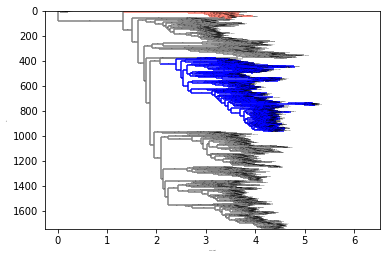

In [116]:
first=ant_member_dict["clade_9-exon"][0]
last=ant_member_dict["clade_9-exon"][len(ant_member_dict["clade_9-exon"])-1]
mrca = tree.common_ancestor({"name": first}, {"name": last})
mrca.color = "blue"
Phylo.draw(tree, branch_labels=None)

In [ ]:
from ete3 import Tree, TreeStyle, faces
t=Tree("ant_OR_Zhou_newick_format_tree.txt")
t.show()


In [102]:
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Phylo import draw
from Bio import Phylo, AlignIO
import subprocess
import matplotlib
import matplotlib.pyplot as plt

#alignment = AlignIO.read('MotifSeqAligned.fasta', 'fasta') # reading the alignment file

#calculator = DistanceCalculator('ident')
#dm = calculator.get_distance(alignment) # distance matrix

#constructor = DistanceTreeConstructor()
#tree = constructor.nj(dm) # build with neighbour joining algorithm a tree from dm

#Phylo.write(tree, 'TreeToCutOff.nwk', 'newick')

plt.rc('font', size=0)          # controls default text sizes #HERE IS THE SETTING FOR THAT ALLOWS ME TO HIDE THE BRANCH TIP LABELS
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('figure', titlesize=18)   # fontsize of the figure title
#plt.xlabel('branch length', fontsize=14, color='red')
#plt.ylabel('taxa',fontsize=14,color='red')

draw(tree, do_show=False)
#plt.savefig("TreeToCutOff.svg", format='svg', dpi=1200)

AttributeError: 'Text' object has no attribute 'depths'

In [124]:
t = Tree( "((a,b),c);" )
circular_style = TreeStyle()
circular_style.mode = "c" # draw tree in circular mode
circular_style.scale = 20
t.render("mytree.png", w=183, units="mm", tree_style=circular_style)

{'nodes': [[302.49124708516064,
   313.55427489791253,
   331.99265458583216,
   343.05568239858405,
   0,
   None],
  [376.78247017906307,
   425.2730007094317,
   406.25010680002714,
   454.7406373303958,
   1,
   None],
  [571.5398587771475,
   313.43504926526754,
   593.0949564356125,
   334.9901469237325,
   2,
   None],
  [181.76358135887588,
   533.7857232158951,
   211.16199381008127,
   563.1841356671005,
   3,
   None],
  [241.1336796802901,
   194.24280594355702,
   270.6682963963956,
   223.77742265966256,
   4,
   None]],
 'faces': [[590.4005692283043,
   273.0192411556458,
   638.8995389598505,
   375.40595503335436,
   2,
   'a'],
  [124.05744718984819,
   529.6104340378686,
   236.86183201041067,
   623.5483662300448,
   3,
   'b'],
  [182.92468837179104,
   134.79004531478444,
   295.8952342077681,
   227.60838663724513,
   4,
   'c']],
 'node_areas': {0: [324.2125980945,
   324.21259809450004,
   340.3789213383487,
   340.37892133834873],
  1: [324.2125980945,
   324.